In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **네이버 영화 리뷰**
1. BeautifulSoup을 통해 원하는 네이버 영화 리뷰 크롤링
2. 한글 리뷰 데이터 토크나이징 및 워드 클라우드 생성
---

# 0. Import

In [1]:
# 폰트 설치용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina' #화질 좋게 해주기")
# 이후에 런타임 다시 시작을 해주시면 폰트가 나옵니다!

# 1. Web Crawling

In [3]:
!pip install bs4
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from bs4 import BeautifulSoup
import os
import re
import requests
import sys
import pandas as pd
from pprint import pprint

In [5]:
# 네이버 영화 리뷰 페이지 주소
url0 = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code='
url1='&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='

# 영화 코드
movie_num = 36944 #영화 '올드보이'

# 네이버 영화 리뷰 페이지 주소(전체)
url2= url0 + str(movie_num) + url1

r0 = requests.get(url2)
html0 = r0.text
page0 = BeautifulSoup(html0, 'lxml')

""" 
(시간이 조금 오래 걸림) 전체 리뷰를 모두 가져오고 싶을 때!
# 전체 리뷰 개수
total_num = page0.select('div[class=score_total] strong[class=total] em')
total_num = total_num[0].text
total_num = total_num.replace(',','')
total_num = int(total_num)

# 전체 리뷰 페이지 개수 (한 페이지에 리뷰 10개)
total_page = total_num // 10 + 1
"""

# 리뷰 페이지 개수 설정
total_page = 100

# 영화 리뷰 데이터셋 생성
movie_review = pd.DataFrame(columns = ['score', 'review'])

# 각 리뷰 페이지에 대해 반복문 실행
for i in range(1, total_page+1):
  url = url2 + str(i)
  r = requests.get(url)
  html = r.text
  page = page = BeautifulSoup(html, 'lxml')

  # 평점 (1~10점)
  score = page.select('div[class=star_score] em')
  score = [i.text for i in score]

  # 감상평
  review = []
  for j in range(len(score)):
    map = 'div[class=score_reple] span[id=_filtered_ment_'+str(j)+']'
    review1 = page.select(map)
    review1 = review1[0].text.strip()
    review.append(review1)
    print(review)

  # 평점과 감상평을 영화 리뷰 데이터셋에 저장
  for j in range(len(score)):
    new_data = {'score': score[j], 'review': review[j]}
    movie_review = movie_review.append(new_data, ignore_index=True)

['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.', '사람은 상상력이 있어서 비겁해 지는거래...']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.', '사람은 상상력이 있어서 비겁해 지는거래...', '10년만에 다시 본 올드보이. 역시 최고였다.']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.', '사람은 상상력이 있어서 비겁해 지는거래...', '10년만에 다시 본 올드보이. 역시 최고였다.', '개인적으로는 레옹보다 명작이라고 생각한다. 한국에서 다시 나오기 힘든 작품']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.', '사람은 상상력이 있어서 비겁해 지는거래...', '10년만에 다시 본 올드보이. 역시 최고였다.', '개인적으로는 레옹보다 명작이라고 생각한다. 한국에서 다시 나오기 힘든 작품', '지금껏본 영화중 제일 재미있었다스토리 전개 하나도나무랄데 없는 작품']
['이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.', '충격적인 영화 촬영 기법, 스토리, 눈물샘을 자

In [6]:
movie_review[:20]

,score,review
0,10,이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.
1,10,"충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에..."
2,10,사람은 상상력이 있어서 비겁해 지는거래...
3,10,10년만에 다시 본 올드보이. 역시 최고였다.
4,10,개인적으로는 레옹보다 명작이라고 생각한다. 한국에서 다시 나오기 힘든 작품
5,10,지금껏본 영화중 제일 재미있었다스토리 전개 하나도나무랄데 없는 작품
6,10,슬프고 더럽고 추악하고 비참하고 불쌍한데 아름답다. 세상엔 그런 아름다움도 있다는걸...
7,10,올드보이를 처음 봤다. 졸라 갇혀서 군만두만 쳐먹는 영화라고만 알고 봤는데 왜 박찬...
8,10,올드보이와 살인의 추억은 한국영화 수작 중 투탑. 두영화 모두 2003년작
9,10,"단점을 찾기가 힘들정도로 완벽했던 영화, 국내 역사상 가장 훌륭하다, 연출,각본,촬..."


In [7]:
print('총 리뷰의 수 :', len(movie_review))

총 리뷰의 수 : 1000


# 2. Data Preprocessing

In [8]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 33.1 MB/s 
     |████████████████████████████████| 453 kB 41.9 MB/s 


In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


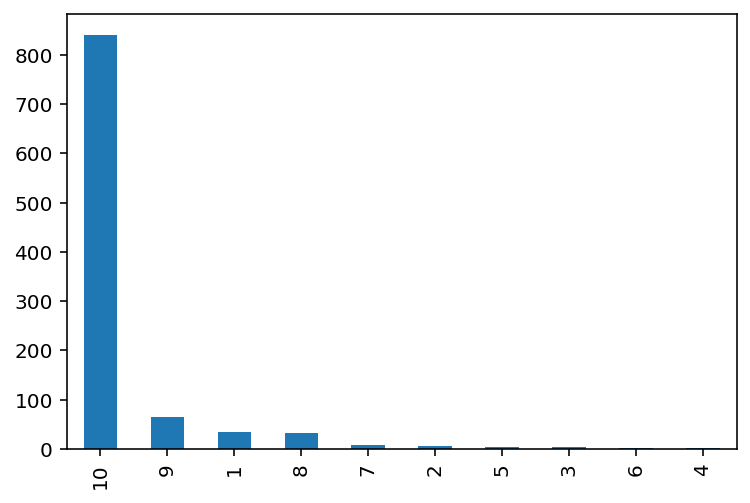

In [10]:
# 데이터 분포 확인
movie_review['score'].value_counts().plot(kind = 'bar')

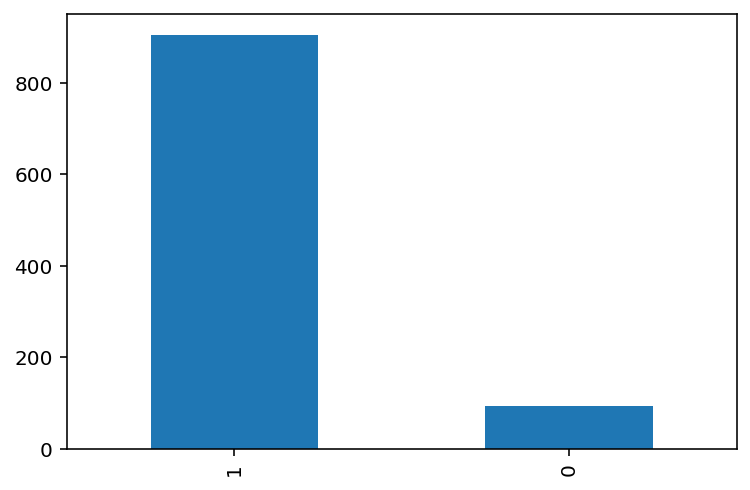

In [11]:
# 평점이 8 초과인 경우 1, 8 이하인 경우 0으로 labeling
movie_review['score'] = movie_review['score'].astype('int')
movie_review['label'] = np.select([movie_review.score > 8], [1], default=0)
movie_review['label'].value_counts().plot(kind = 'bar')

In [12]:
# 각 열에 대해서 중복을 제외한 샘플의 수 카운트
movie_review['score'].nunique(), movie_review['review'].nunique(), movie_review['label'].nunique()

(10, 984, 2)

In [13]:
# review 열 중복 제거
movie_review.drop_duplicates(subset=['review'], inplace=True)
print('총 샘플의 수 :', len(movie_review))

총 샘플의 수 : 984


In [14]:
# NA값 있는지 확인
print(movie_review.isnull().values.any())

False


**불순어 제거 및 텍스트 데이터 전처리**

In [15]:
movie_review.head()

,score,review,label
0,10,이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.,1
1,10,"충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에...",1
2,10,사람은 상상력이 있어서 비겁해 지는거래...,1
3,10,10년만에 다시 본 올드보이. 역시 최고였다.,1
4,10,개인적으로는 레옹보다 명작이라고 생각한다. 한국에서 다시 나오기 힘든 작품,1


In [40]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

# 불용어 설정
import pandas as pd
sw=pd.read_table("/content/drive/Shareddrives/22-2 KUBIG NLP 분반/Week2/과제 제출/[2주차 병주]/stopwords.txt",header=None)
stopwords=sw[0].to_list()
sw2=pd.read_table("/content/drive/Shareddrives/22-2 KUBIG NLP 분반/Week2/과제 제출/[2주차 병주]/한국어불용어100.txt",header=None)
stopwords.append(sw2[0].to_list())

df = movie_review

# 불순어 제거
df['text'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['text'].replace('', np.nan, inplace=True)

# 결측치로 변한 행 제거
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [41]:
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


# 3. Word Cloud 생성

**토크나이징 후 명사만 추출**

In [50]:
#konlpy로 명사만 추출하는 토큰화를 진행
okt = Okt()
token = []
for sentence in df['text']:
    temp_X = []
    temp_X = okt.nouns(sentence) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
df['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [51]:
from collections import Counter 

# 단어 빈도 수 세어서 가장 빈도 높은 400개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(df['token'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(400))
    return input

In [52]:
from wordcloud import WordCloud

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color):  
  df2 = tokenizing(df)
  fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
  wordcloud = WordCloud(font_path = fontpath, max_words=100, colormap = color,
                      width=900,height=500, background_color ='white')
  wordcloud = wordcloud.generate_from_frequencies(df2) #빈도에 따라서 
  plt.figure(figsize = (15 , 10))
  plt.axis("off")
  plt.imshow(wordcloud)

wcdraw 함수의 color 부분은 matplotlib color palette 중 아무거나 쓰셔도 됩니다!  
하단의 링크를 참고해 주세요.  

https://matplotlib.org/stable/tutorials/colors/colormaps.html

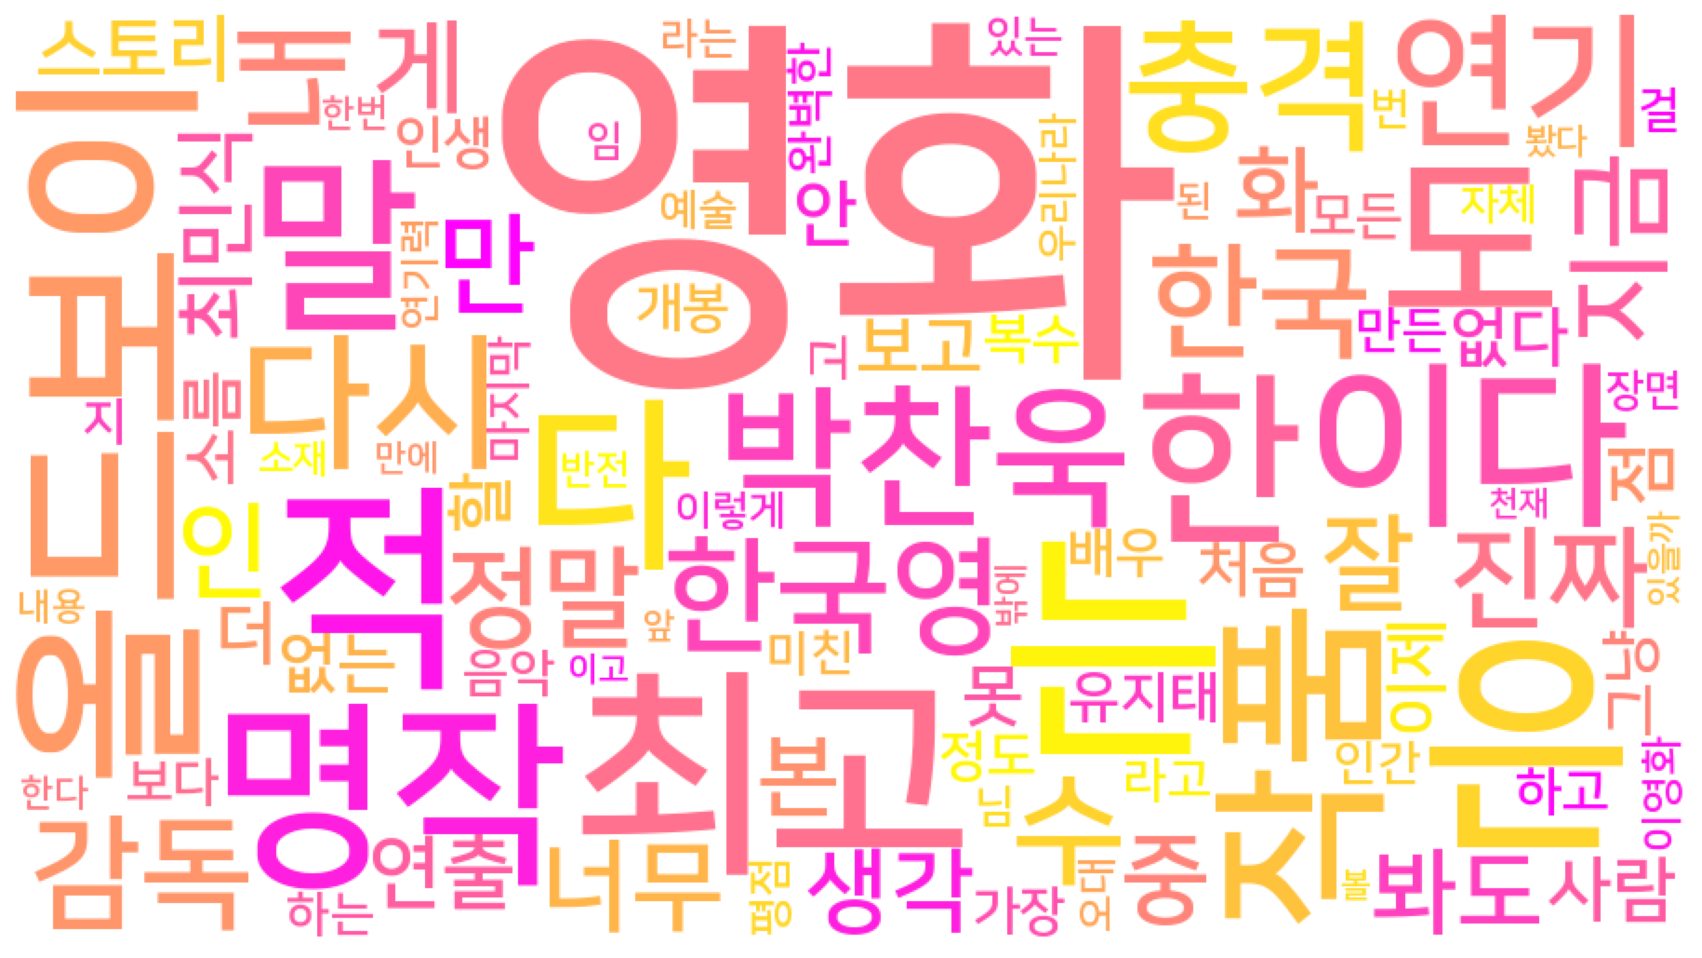

In [49]:
wcdraw(df,'spring')